In [1]:
import warnings
warnings.filterwarnings('ignore')

## 패션 MNIST 데이터 불러오기

In [2]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

- keras에서 입력데이터가 3차원으로 구성되어 있을 것이라고 가정하고 있으므로 차원을 추가해서 Channel차원으로 1을 추가하였음.
- train set을 train 과 valid로 구분

- <img src="../Data/차원추가.png"  width="200" height="100"> 

# 함성곱 신경망 만들기

In [3]:
model = keras.Sequential()

In [4]:
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (28, 28, 1)
    )
)

In [5]:
model.add(keras.layers.MaxPool2D(2))

In [6]:
model.add(
    keras.layers.Conv2D(
        64, # 필터의 갯수
        kernel_size=3,
        activation = 'relu',
        padding = 'same'
    )
)

In [7]:
model.add(keras.layers.MaxPool2D(2)) # 2는 2x2

In [8]:
# 딥러닝 모델 만들기
model.add(keras.layers.Flatten()) # 1차원으로 쫙바뀌고
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax')) # 마지막 레이어 => 출력층


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

### Model Compile과 훈련

In [13]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
            train_scaled, 
            train_target,
            epochs=50, 
            validation_data=(val_scaled, val_target),
            callbacks=[checkpoint_cb, early_stopping_cb]
        )

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5324 - accuracy: 0.8077 - val_loss: 0.3453 - val_accuracy: 0.8713
Epoch 2/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3525 - accuracy: 0.8720 - val_loss: 0.2869 - val_accuracy: 0.8929
Epoch 3/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3046 - accuracy: 0.8904 - val_loss: 0.2545 - val_accuracy: 0.9033
Epoch 4/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2718 - accuracy: 0.9006 - val_loss: 0.2577 - val_accuracy: 0.9045
Epoch 5/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2456 - accuracy: 0.9112 - val_loss: 0.2508 - val_accuracy: 0.9080
Epoch 6/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2238 - accuracy: 0.9174 - val_loss: 0.2298 - val_accuracy: 0.9158
Epoch 7/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2055 - accuracy: 0.9241 - val_loss: 0.2211 - val_ac

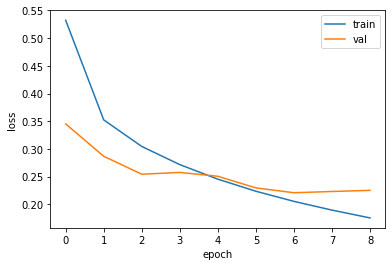

In [15]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.9179


[0.22109179198741913, 0.9179166555404663]

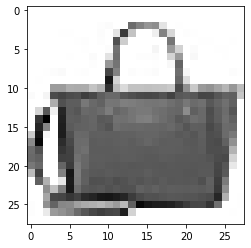

In [18]:
# 이미지 확인해보기
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [19]:
pred = model.predict(val_scaled[0:1])
print(pred)

1/1 [==============================] - 0s 49ms/step
[[2.5155224e-17 2.8716907e-23 1.0692621e-19 1.0205316e-17 5.0628210e-18
  1.4001426e-16 1.9316042e-17 2.5552238e-17 1.0000000e+00 8.5587887e-20]]


In [22]:
# 계단함수
import numpy as np
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커스','가방','앵글부츠']

In [23]:
print(classes[np.argmax(pred)])

가방


### 시험데이터를 확인하기(일반화 성능 체크)

In [24]:
teat_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [25]:
model.evaluate(teat_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.9119


[0.24251674115657806, 0.911899983882904]